# KPMG Virtual Internship

Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (customer demographic, customer address and transactions) as a labelled dataset, recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.




Analysis method will be using K means and RFM metrics
1. Recency: customer's time since last order/last engaged with the product
2. Frequency: customer's total number of transaction, average time between transaction
3. Monetary: customer's total/average transaction value in the store
   

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime


%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style("dark")


#define color for the seaborn visuals
C_Blue = '#2CBDFE'
C_Green = '#47DBCD'
C_Pink = '#F3A0F2'
C_Purple = '#9D2EC5'
C_Violet = '#661D98'
C_Amber = '#F5B14C'

color_list = [C_Blue, C_Green, C_Amber, C_Pink,
              C_Violet]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

# Reformat Data for RMF Analysis

In [2]:
#export data from task 1 that has been reprocessed and merged

df = pd.read_excel('~/Desktop/Processed_Raw Data.xlsx', sheet_name='CD_All')

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19437 entries, 0 to 19436
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19437 non-null  int64         
 1   product_id                           19437 non-null  int64         
 2   customer_id                          19437 non-null  int64         
 3   transaction_date                     19437 non-null  datetime64[ns]
 4   recency                              19437 non-null  int64         
 5   online_order                         19437 non-null  int64         
 6   order_status                         19437 non-null  object        
 7   brand                                19437 non-null  object        
 8   product_line                         19437 non-null  object        
 9   product_class                        19437 non-null  object        
 10  product_si

In [5]:
df.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
recency                                   0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
profit                                    0
product_first_sold_date                   0
first_name                             5805
last_name                              5805
gender                                 5805
past_3_years_bike_related_purchases    5805
DOB                                    5805
Age                                    5805
job_title                              5805
job_industry_category           

In [6]:
df.count()

transaction_id                         19437
product_id                             19437
customer_id                            19437
transaction_date                       19437
recency                                19437
online_order                           19437
order_status                           19437
brand                                  19437
product_line                           19437
product_class                          19437
product_size                           19437
list_price                             19437
standard_cost                          19437
profit                                 19437
product_first_sold_date                19437
first_name                             13632
last_name                              13632
gender                                 13632
past_3_years_bike_related_purchases    13632
DOB                                    13632
Age                                    13632
job_title                              13632
job_indust

In [7]:
#demographic data in transaction are not complete (missing around 30%)

(df.isnull().sum()).div(19437)*100

transaction_id                          0.00000
product_id                              0.00000
customer_id                             0.00000
transaction_date                        0.00000
recency                                 0.00000
online_order                            0.00000
order_status                            0.00000
brand                                   0.00000
product_line                            0.00000
product_class                           0.00000
product_size                            0.00000
list_price                              0.00000
standard_cost                           0.00000
profit                                  0.00000
product_first_sold_date                 0.00000
first_name                             29.86572
last_name                              29.86572
gender                                 29.86572
past_3_years_bike_related_purchases    29.86572
DOB                                    29.86572
Age                                    2

In [8]:
#eliminating rows that contain NA, only customer with complete demographic & address data can be identified for precise segmentation

df.dropna()

,transaction_id,product_id,customer_id,transaction_date,recency,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,2575,64,1291,2017-07-03,181,1,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,872.89,2012-05-18,Warner,Zuker,Male,0.0,29449.0,40.0,Quality Engineer,Health,Mass Customer,N,No,12.0,8 Kinsman Alley,4304.0,QLD,Australia,2.0
2,4561,38,1291,2017-11-08,53,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,751.02,2011-03-16,Warner,Zuker,Male,0.0,29449.0,40.0,Quality Engineer,Health,Mass Customer,N,No,12.0,8 Kinsman Alley,4304.0,QLD,Australia,2.0
4,6606,38,1291,2017-12-14,17,0,Approved,Solex,Standard,medium,medium,1577.53,826.51,751.02,2011-03-16,Warner,Zuker,Male,0.0,29449.0,40.0,Quality Engineer,Health,Mass Customer,N,No,12.0,8 Kinsman Alley,4304.0,QLD,Australia,2.0
5,12917,83,1291,2017-05-04,241,1,Approved,Solex,Touring,medium,large,2083.94,675.03,1408.91,2013-09-16,Warner,Zuker,Male,0.0,29449.0,40.0,Quality Engineer,Health,Mass Customer,N,No,12.0,8 Kinsman Alley,4304.0,QLD,Australia,2.0
9,16555,90,1291,2017-01-17,348,1,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,72.60,2005-05-10,Warner,Zuker,Male,0.0,29449.0,40.0,Quality Engineer,Health,Mass Customer,N,No,12.0,8 Kinsman Alley,4304.0,QLD,Australia,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19432,4380,20,1554,2017-06-29,185,0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,195.34,2014-03-03,Land,Aarons,Male,83.0,34558.0,26.0,Assistant Manager,Retail,Affluent Customer,N,No,3.0,277 Maple Circle,2768.0,NSW,Australia,8.0
19433,7682,3,1554,2017-11-11,50,0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2011-08-24,Land,Aarons,Male,83.0,34558.0,26.0,Assistant Manager,Retail,Affluent Customer,N,No,3.0,277 Maple Circle,2768.0,NSW,Australia,8.0
19434,11936,85,1554,2017-08-06,147,0,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,547.28,1999-06-23,Land,Aarons,Male,83.0,34558.0,26.0,Assistant Manager,Retail,Affluent Customer,N,No,3.0,277 Maple Circle,2768.0,NSW,Australia,8.0
19435,16790,89,1554,2017-08-09,144,1,Approved,WeareA2B,Touring,medium,large,1362.99,57.74,1305.25,2016-07-09,Land,Aarons,Male,83.0,34558.0,26.0,Assistant Manager,Retail,Affluent Customer,N,No,3.0,277 Maple Circle,2768.0,NSW,Australia,8.0


In [9]:
df1 = df.dropna()

In [10]:
df1.to_excel('no na.xlsx', index = True)

In [11]:
#descriptive statistics to check abnormal data

df1.describe().round(2)

,transaction_id,product_id,customer_id,recency,online_order,list_price,standard_cost,profit,past_3_years_bike_related_purchases,DOB,Age,tenure,postcode,property_valuation
count,13620.00,13620.0,13620.00,13620.00,13620.0,13620.00,13620.00,13620.00,13620.00,13620.00,13620.00,13620.00,13620.00,13620.00
mean,10004.36,45.6,1716.29,182.43,0.5,1109.91,557.93,551.98,49.48,28383.74,43.30,10.74,2998.95,7.48
std,5768.25,30.5,1010.47,105.59,0.5,584.26,408.53,493.84,28.60,4577.88,12.53,5.67,859.72,2.84
min,1.00,0.0,1.00,1.00,0.0,12.01,7.21,4.80,0.00,11619.00,19.00,1.00,2000.00,1.00
25%,5034.50,18.0,830.00,89.00,0.0,575.27,215.14,135.33,25.00,24978.00,34.00,6.00,2197.00,6.00
50%,9998.50,44.0,1717.00,182.00,0.0,1163.89,507.58,445.21,48.00,28395.00,43.00,11.00,2768.00,8.00
75%,14986.50,72.0,2586.00,274.00,1.0,1635.30,795.10,827.16,74.00,31885.00,53.00,16.00,3799.00,10.00
max,20000.00,100.0,3497.00,364.00,1.0,2091.47,1759.85,1702.55,99.00,37326.00,89.00,22.00,4883.00,12.00


In [12]:
#reference date for recency analysis

ref_date = max(df1['transaction_date']) + datetime.timedelta(days=1)

print('reference date: {}'.format(ref_date.date()))

reference date: 2017-12-31


In [13]:
#agregate data per invoice

df1_inv = df1.groupby(['recency','transaction_id','customer_id']).agg({'profit':'sum'})
df1_inv = df1_inv.reset_index()
df1_inv

,recency,transaction_id,customer_id,profit
0,1,253,3123,64.93
1,1,411,3355,179.44
2,1,606,2878,198.29
3,1,748,2865,872.89
4,1,1033,934,133.38
...,...,...,...,...
13615,364,16575,1745,4.80
13616,364,17839,642,1630.25
13617,364,17907,1852,1383.61
13618,364,18436,2011,75.48


In [14]:
#aggregate data for each customer

customers = df1_inv.groupby(['customer_id']).agg({
    'recency': 'min', #take the most recent transaction, hence using min
    'transaction_id':'count',
    'profit':'sum'
})

customers.rename(columns = {
    'recency':'Recency',
    'transaction_id': 'Frequency',
    'profit':'Monetary'
}, inplace = True)

In [15]:
customers

,Recency,Frequency,Monetary
customer_id,,,
1,8,11,3018.09
2,129,3,2226.26
9,79,6,2353.11
12,68,7,3540.03
13,28,7,4337.38
...,...,...,...
3493,94,6,3728.88
3494,5,4,2755.11
3495,14,7,3847.65


# Data Analysis Exploration

In [16]:
customers.describe().round(2)

,Recency,Frequency,Monetary
count,2445.00,2445.00,2445.00
mean,63.42,5.57,3074.82
std,59.67,2.27,1768.19
min,1.00,1.00,15.08
25%,19.00,4.00,1796.00
50%,45.00,5.00,2795.77
75%,88.00,7.00,4087.04
max,354.00,14.00,11668.95


From the descriptive statistics table, it can be conclude that:
1. Customers' avg. transaction is 63 days ago
2. Customers' avg. purchase is 5 times
3. Customers' avg. total spending is 5 time $3,075

### Data Distribution

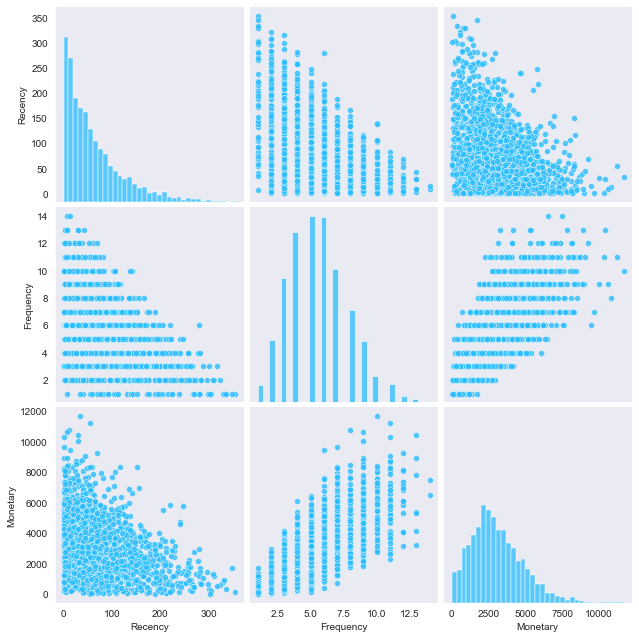

In [17]:
#create pairplot to see correlation and data distribution
sns.pairplot(customers,plot_kws = {'alpha': 0.8},height=3)

In [18]:
#since data has skewness tendency, conduct transformation hence data more normally distributed

log_customers = np.log10(customers)
log_customers.head()

,Recency,Frequency,Monetary
customer_id,,,
1,0.903090,1.041393,3.479732
2,2.110590,0.477121,3.347576
9,1.897627,0.778151,3.371642
12,1.832509,0.845098,3.549007
13,1.447158,0.845098,3.637227


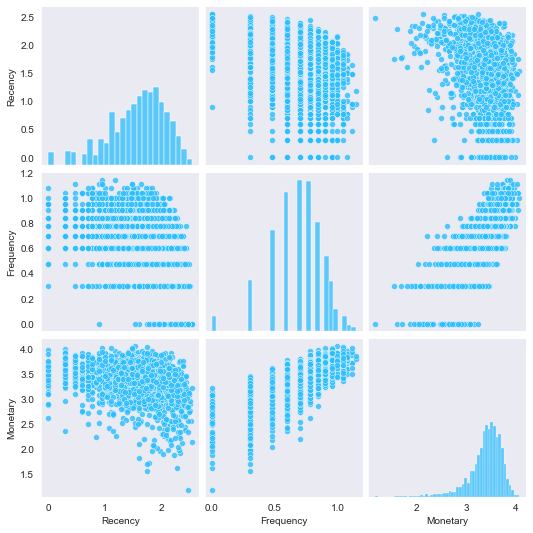

In [19]:
sns.pairplot(log_customers,plot_kws = {'alpha': 0.8},height=2.5)

In [20]:
#import library
from sklearn.preprocessing import StandardScaler

#object initialization
scaler = StandardScaler()

#fit and transform data
scaler.fit(log_customers)
customers_std = scaler.transform(log_customers)

#change the result of standarization into data frame
customers_std = pd.DataFrame(customers_std,
                             index=log_customers.index,columns=log_customers.columns)

customers_std.rename(columns ={'Recency':'R_std',
                                  'Frequency':'F_std',
                                  'Monetary':'M_std'}, inplace = True )

customers_std.head()

,R_std,F_std,M_std
customer_id,,,
1,-1.319964,1.669098,0.258688
2,1.049315,-1.125659,-0.137542
9,0.631454,0.365300,-0.065387
12,0.503683,0.696878,0.466387
13,-0.252428,0.696878,0.730889


In [21]:
customers_std.describe().round()

,R_std,F_std,M_std
count,2445.0,2445.0,2445.0
mean,0.0,-0.0,-0.0
std,1.0,1.0,1.0
min,-3.0,-3.0,-7.0
25%,-1.0,-1.0,-0.0
50%,0.0,-0.0,0.0
75%,1.0,1.0,1.0
max,2.0,2.0,2.0


<AxesSubplot:xlabel='R_std', ylabel='Density'>

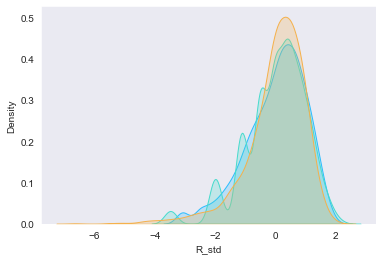

In [22]:
#visualize normalized data with distplot
sns.kdeplot( customers_std["R_std"] , color=C_Blue,shade=True )
sns.kdeplot( customers_std["F_std"] , color=C_Green,shade=True)
sns.kdeplot( customers_std["M_std"] , color=C_Amber,shade=True)

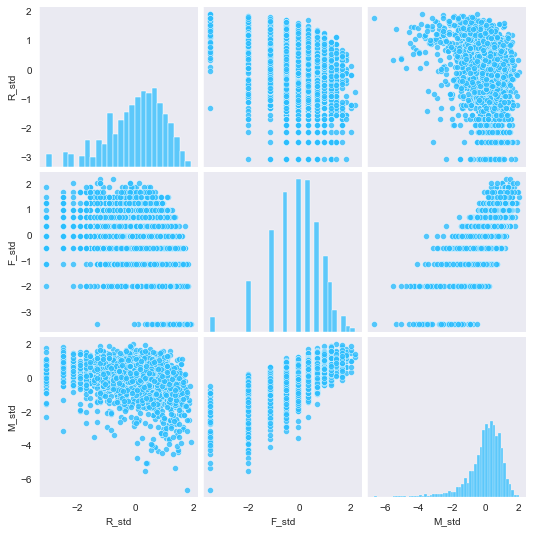

In [23]:
#create pairplot to see correlation and data distribution
sns.pairplot(customers_std,plot_kws = {'alpha': 0.8},height=2.5)

# Data Modeling and Evaluation

### Creating Elbow Plot

to determine how many optimum clusters will be made for executing K-means algorithms

In [24]:
#library
from sklearn.cluster import KMeans

#creating dictionary
sse = {}
kmeans = {}
labels = {}
central = {}

#fit KMeans and calculate SSE for each k
for k in range(1, 16):
  
    #initialize KMeans with k clusters and fit it 
    kmeans[k] = KMeans(n_clusters=k, init = 'k-means++', random_state = 99).fit(customers_std)
    
    #assign cluster results to dictionary
    sse[k] = kmeans[k].inertia_
    labels[k] = kmeans[k].labels_ 
    central[k] = kmeans[k].cluster_centers_

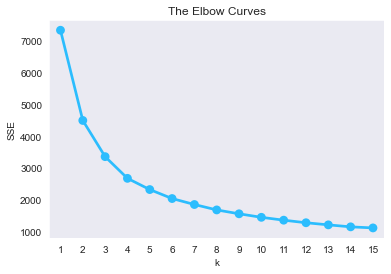

In [25]:
#plotting Elbow Curves

plt.title('The Elbow Curves'); plt.xlabel('k'); plt.ylabel('SSE')

#plotting Sum Square Error
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Elbow in K = 4, hence we will have 4 clusters

### Data Clustering

In [26]:
#adding cluster label into data frame
df_final = customers_std.assign(cluster = labels[4])

df_final.head()

,R_std,F_std,M_std,cluster
customer_id,,,,
1,-1.319964,1.669098,0.258688,3
2,1.049315,-1.125659,-0.137542,2
9,0.631454,0.365300,-0.065387,1
12,0.503683,0.696878,0.466387,1
13,-0.252428,0.696878,0.730889,1


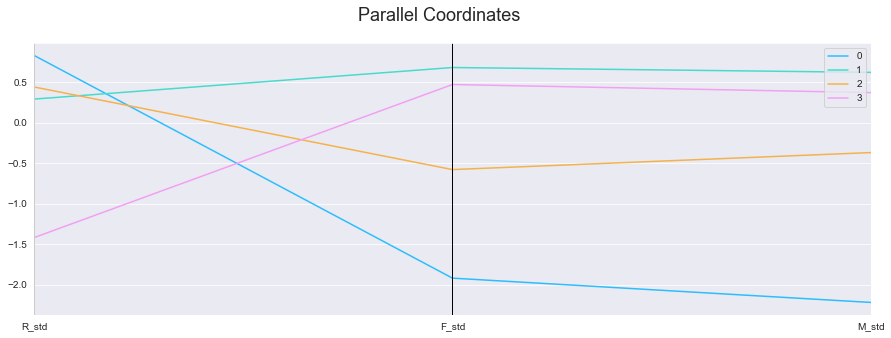

In [27]:
sns.set_style('dark')

from pandas.plotting import parallel_coordinates

# Cluster Central by Mean
df_plot = df_final.groupby(['cluster']).mean().round(2)

df_plot = df_plot.reset_index()

fig = plt.figure(figsize=(15, 5))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
# fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(df_plot, 
                         'cluster',
                          color = color_list
                          )

In [28]:
#merge with the original data set
df_join = df_final.merge(customers, how = 'inner', left_index = True, right_index = True)

#taking the output from clusters
df_result = df_join[['Recency','Frequency','Monetary','cluster']]

In [29]:
#mean from each clusters
df_mean_rfm = df_result.groupby(['cluster']).mean().round(2)

df_mean_rfm

,Recency,Frequency,Monetary
cluster,,,
0,136.69,2.25,591.24
1,62.27,7.12,4232.14
2,82.75,3.99,2010.29
3,9.18,6.60,3675.15


### Labelling Customer Segment

4 customer segmentations from parallel coordinates graph can be defined as
- Cluster 0 (LOSS) : No longer transacting, low frequency and monetary
- Cluster 1 (LOYAL) : Active in transaction, high frequency and monetary
- Cluster 2 (CHURN) : Stop transacting after several purchase, low monetary
- Cluster 3 (POTENTIAL) : Active, potential frequency and monetary

In [30]:
grouped_df = df_result.groupby(['cluster'])
aggregate = grouped_df.agg({
    'Recency': ['count','min','mean','median','max','std'],
    'Frequency': ['min','mean','median','max','std'],
    'Monetary': ['min','mean','median','max','std']
  }).round(2)
aggregate.T

cluster                 0         1        2         3
Recency   count    214.00    896.00   785.00    550.00
          min        2.00     15.00     6.00      1.00
          mean     136.69     62.27    82.75      9.18
          median   126.00     52.00    67.00      9.00
          max      354.00    279.00   288.00     21.00
          std       87.21     38.26    58.61      5.42
Frequency min        1.00      4.00     2.00      2.00
          mean       2.25      7.12     3.99      6.60
          median     2.00      7.00     4.00      6.00
          max        5.00     14.00     7.00     14.00
          std        0.88      1.63     0.97      2.04
Monetary  min       15.08   1370.37   502.12    409.80
          mean     591.24   4232.14  2010.29   3675.15
          median   533.02   4005.54  1938.37   3335.56
          max     1702.55  11668.95  4727.75  10787.60
          std      376.79   1467.87   759.74   1718.89

In [31]:
df_result = df_result.copy()

In [32]:
df_result['segments'] = df_result['cluster'].map({
    0.0: 'Loss',
    1.0: 'Loyal',
    2.0: 'Churn',
    3.0: 'Potential'
})

df_result['score'] = df_result['cluster'].map({
    0.0: 1,
    1.0: 4,
    2.0: 2,
    3.0: 3
})

df_result.head(10)

,Recency,Frequency,Monetary,cluster,segments,score
customer_id,,,,,,
1,8,11,3018.09,3,Potential,3
2,129,3,2226.26,2,Churn,2
9,79,6,2353.11,1,Loyal,4
12,68,7,3540.03,1,Loyal,4
13,28,7,4337.38,1,Loyal,4
14,48,3,1713.90,2,Churn,2
15,36,6,1728.39,2,Churn,2
19,281,2,1736.45,2,Churn,2
20,32,4,3608.28,2,Churn,2


### Customer Distribution in each segment

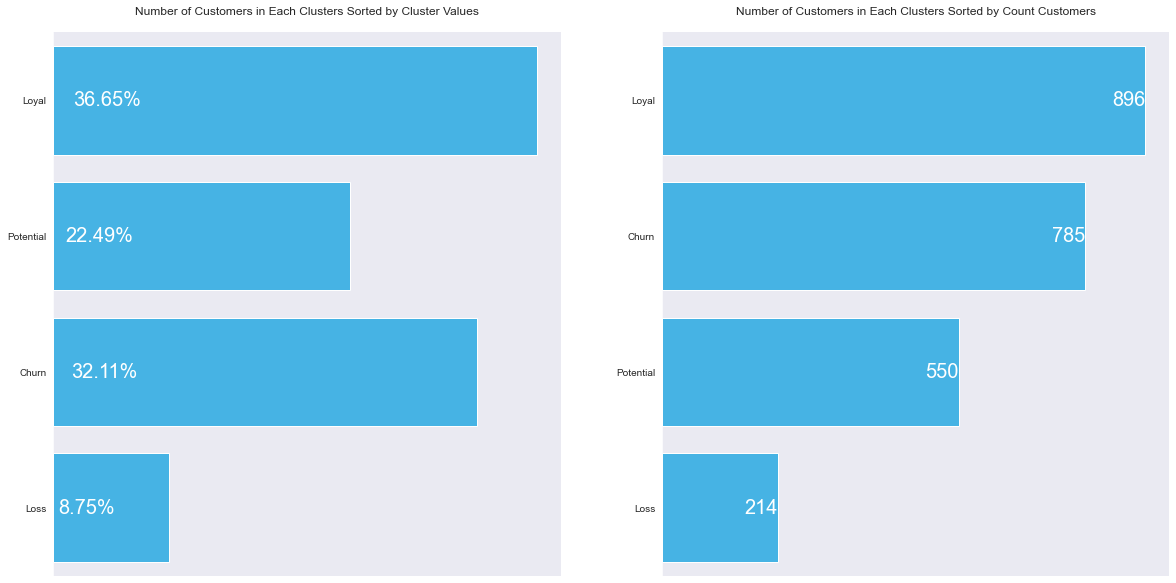

In [33]:
f, ax = plt.subplots(1,2, figsize=(20, 10))

# Chart based on Level Cluster
g = sns.barplot(x = df_result['segments'].value_counts(), 
                y = df_result['segments'].value_counts().index , 
                order = ['Loyal','Potential','Churn','Loss'], 
                color = C_Blue,
                ax = ax[0])

# Chart based on Number of Customers
g = sns.barplot(x = df_result['segments'].value_counts(), 
                y = df_result['segments'].value_counts().index , 
                color = C_Blue,
                ax = ax[1])

# Menambahkan Judul
ax[0].set(title = 'Number of Customers in Each Clusters Sorted by Cluster Values\n',
          xlabel = '',
          xticks = ([]))

ax[1].set(title = 'Number of Customers in Each Clusters Sorted by Count Customers\n',
          xlabel = '',
          xticks = ([]))

sns.despine(right=True, bottom=True,top = True)


# Add Label
labels = df_result['segments'].value_counts().index

X_1 = df_result['segments'].value_counts(sort = False, normalize = True)*100
X_1 = X_1.reindex(['Loyal','Potential','Churn','Loss'])
X_2 = df_result['segments'].value_counts()


for n, i in enumerate(labels):
    #Create an axis text object
    ax[0].text(X_1[n]-0.003, # X location of text (with adjustment)
            n, # Y location
            s=f'{round(X_1[n],2):,}%', #Required label with formatting
            va='center', #Vertical alignment
            ha='left', #Horizontal alignment
            color='white', #Font colour and size
            fontsize=20)
    ax[1].text(X_2[n]-0.1, # X location of text (with adjustment)
            n, # Y location
            s=f'{round(X_2[n],2):,}', #Required label with formatting
            va='center', #Vertical alignment
            ha='right', #Horizontal alignment
            color='white', #Font colour and size
            fontsize=20)


In [34]:
df_result.to_excel('Task 2 - Data Analysis.xlsx', index = True)